In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
path =  'ex1data1.txt'#加载文件
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
#pandas库pd.read_csv操作可以读取分隔符csv文件和文本text文件，filepath_or_buffer:顾名思义，您读取的文件路径,URL（包含http,ftp,s3）链接等
# sep：指定分隔符，默认为逗号',如果不指定参数，则会尝试使用逗号分隔。分隔符长于一个字符并且不是‘\s+’,将使用python的语法分析器。
# 正则表达式中\s匹配任何空白字符，包括空格、制表符、换页符等等, 等价于[ \f\n\r\t\v]，而“\s+”则表示匹配任意多个上面的字符。
# header：指定哪一行作为表头。默认设置为0（即第一行作为表头），如果没有表头的话，要修改参数，设置header=None
# names：指定列的名称，用列表表示。一般我们没有表头，即header=None时，这个用来添加列名就很有用啦！
data.head()#用来查看前5行数据

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [18]:
data.describe()#data.describe( )：describe() 函数可以查看数据的基本情况，包括：count 非空值数、mean 平均值、std 标准差、max 最大值、min 最小值、（25%、50%、75%）分位数等。

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


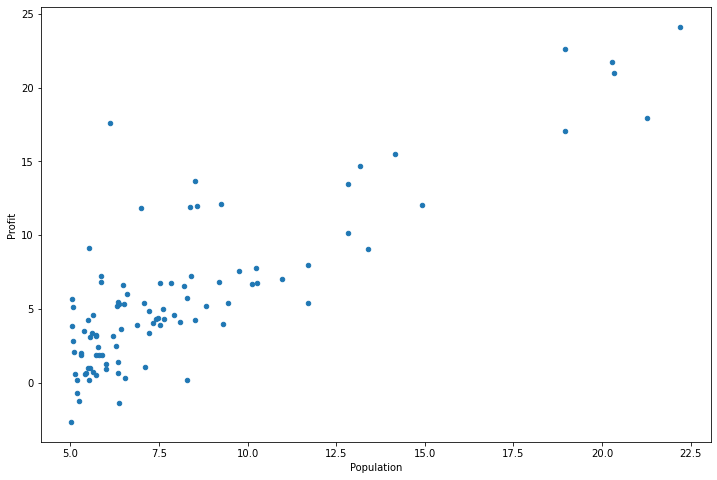

In [19]:
#pandas画图函数，kind='scatter'代表散点图，需指定X轴Y轴
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))
plt.show()

代价函数：首先，我们将创建一个以参数θ为特征函数的代价函数：
$$ J(θ)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}} $$
其中：$${{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}$$

In [20]:
#求J(θ)
def computeCost(X, y, theta):#X代表训练集
    inner = np.power(((X * theta.T) - y), 2)#theta.T代表theta的转置矩阵
    #numpy.power()用于数组元素求n次方，numpy.power(x1, x2) ：x2可以是数字，也可以是数组，但是x1和x2的列数要相同
    return np.sum(inner) / (2 * len(X))

为了考虑截距项（$θ_0 $），我们向X添加额外的第一列，并将其设置为all one。这使得我们可以将$θ_0 $简单地看作另一个“特性”。
即：$$ {{h}_{\theta }}\left( x \right)= {{\theta}_{0}}+ {{\theta}_{1}{{x}_1}}$$

In [21]:
data.insert(0, 'Ones', 1,allow_duplicates=True)#在data的指定列中插入数据。
# 可选参数，如果dataframe中已经存在某列，将allow_duplicates置为true才可以将指定得列插入。

初始化数据

In [24]:
cols = data.shape[1]#shape函数是numpy.core.fromnumeric中的函数，它的功能是读取矩阵的长度，
#比如shape[0]就是读取矩阵第一维度的长度,相当于行数;shape[1]相当于列数
X = data.iloc[:,0:cols-1]#提取所有行，从0列到cols-1列的所有数据
y = data.iloc[:,cols-1:cols]#提取所有行，从cols-1列到cols列的所有数据
#例：data.iloc[[0,1],[0,1]] #提取第0、1行，第0、1列中的数据
X.head()#head()是观察前5行

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


查看y

In [25]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


代价函数是应该是numpy矩阵，所以我们需要转换X和Y，然后才能使用它们。 我们还需要初始化theta。

In [26]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

看下三个矩阵的维度

In [27]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

计算代价函数 (theta初始值为0).

In [28]:
computeCost(X, y, theta)

32.072733877455676

## 实现批量梯度下降
使用梯度下降算法来求出代价函数${{J}({\theta}_{0},{\theta}_{1})} $的最小值,
批量梯度下降算法的公式如下：
$$ {{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)(for\ j=0\ and\ j=1) $$

In [29]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

初始化 学习速率α和要执行的迭代次数。

In [30]:
alpha = 0.01
iters = 1000

运行梯度下降算法来将我们的参数θ适合于训练集

In [31]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

最后，使用拟合的参数计算训练模型的代价函数（误差）。

In [32]:
computeCost(X, y, g)


4.515955503078912

绘制线性模型以及数据，直观地看出它的拟合。

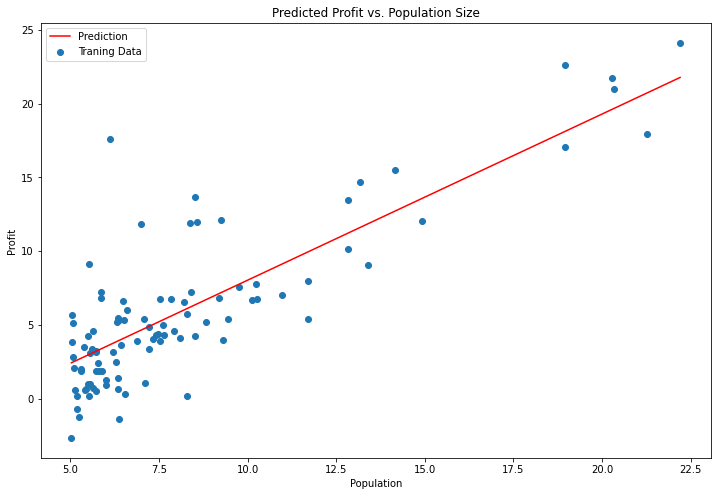

In [33]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()